In [ ]:
import pip
pip.main(["install","matplotlib"])
pip.main(["install","numpy"])

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pprint
import os, sys
import seaborn as sns
import pandas as pd

In [6]:
approach_to_fpath_dict = {
                          # "KKT": ["..\\logs\\gap_vs_time\\Pop_2_2022_6_12_19_44_2_510\\kkt_Pop.txt"],
                          "Single Shot (KKT)": {
                              0: ["..\\logs\\gap_vs_time\\Pop_2_2022_6_16_10_48_1_199\\kkt_Pop_2022_6_16_10_48_2_622.txt"],
                          },
                          #   "Simulated Annealing": ["c:\\tmp\\logs\\Pop_2_2022_6_13_3_51_20_106\\simulatedannealing_Pop.txt",
                          #                           "c:\\tmp\\logs\\Pop_2_2022_6_13_8_58_38_604\\simulatedannealing_Pop.txt"],
                          # "Simulated Annealing1": ["..\\logs\\gap_vs_time\\Pop_2_2022_6_13_11_8_49_993\\simulatedannealing_Pop.txt"],
                        #   "Simulated Annealing": ["..\\logs\\gap_vs_time\\Pop_2_2022_6_16_9_20_12_70\\simulatedannealing_Pop_0_2022_6_16_9_53_33_828.txt"],
                          "Simulated Annealing": {
                                    0: ["..\\logs\\gap_vs_time\\Pop_2_2022_6_16_9_20_12_70\\simulatedannealing_Pop_0_2022_6_16_9_53_33_828.txt"],
                                    1: ["..\logs\\gap_vs_time\\Pop_2_2022_6_16_12_12_26_613\\simulatedannealing_Pop_1_2022_6_16_12_29_7_130.txt"],
                                    2: ["..\\logs\\gap_vs_time\\Pop_2_2022_6_16_13_37_3_831\\simulatedannealing_Pop_2_2022_6_16_13_53_44_381.txt"],
                                    3: ["..\\logs\\gap_vs_time\\Pop_2_2022_6_16_14_43_6_105\\simulatedannealing_Pop_3_2022_6_16_14_59_46_598.txt"]
                            },
                          # "Hill Climber": ["..\\logs\\gap_vs_time\\Pop_2_2022_6_12_22_46_42_289\\hillclimbing_Pop.txt"],
                        #   "Hill Climber": ["..\\logs\\gap_vs_time\\Pop_2_2022_6_16_9_20_12_70\\hillclimbing_Pop_0_2022_6_16_9_36_52_954.txt"],
                         "Hill Climber": {
                                    0: ["..\\logs\\gap_vs_time\\Pop_2_2022_6_16_9_20_12_70\\hillclimbing_Pop_0_2022_6_16_9_36_52_954.txt"],
                                    1: ["..\logs\gap_vs_time\Pop_2_2022_6_16_12_12_26_613\hillclimbing_Pop_1_2022_6_16_12_12_26_842.txt"],
                                    2: ["..\\logs\gap_vs_time\\Pop_2_2022_6_16_13_37_3_831\\hillclimbing_Pop_2_2022_6_16_13_37_4_70.txt"],
                                    3: ["..\\logs\\gap_vs_time\\Pop_2_2022_6_16_14_43_6_105\\hillclimbing_Pop_3_2022_6_16_14_43_6_388.txt"]
                            },
                          # "Random1": ["..\\logs\\gap_vs_time\\Pop_2_2022_6_12_19_44_2_510\\randomSearch_Pop.txt"],
                        #   "Random": ["..\\logs\\gap_vs_time\\Pop_2_2022_6_16_9_20_12_70\\randomSearch_Pop_0_2022_6_16_10_10_14_150.txt"]
                        "Random": {
                                    0: ["..\\logs\\gap_vs_time\\Pop_2_2022_6_16_9_20_12_70\\randomSearch_Pop_0_2022_6_16_10_10_14_150.txt"],
                                    1: ["..\logs\gap_vs_time\Pop_2_2022_6_16_12_12_26_613\\randomSearch_Pop_1_2022_6_16_12_45_47_431.txt"],
                                    2: ["..\\logs\gap_vs_time\\Pop_2_2022_6_16_13_37_3_831\\randomSearch_Pop_2_2022_6_16_14_10_24_650.txt"],
                                    3: ["..\\logs\\gap_vs_time\\Pop_2_2022_6_16_14_43_6_105\\randomSearch_Pop_3_2022_6_16_15_16_26_860.txt"]
                                  }
                        }
approach_to_dur_gap_mapping = dict()


In [7]:
output_fig_dir = "..\\figs\\"
if not os.path.isdir(output_fig_dir):
    os.mkdir(output_fig_dir)

In [13]:
max_gap = 0

df_dictionary = {"approach": [], "gap": [], "dur": [], "seed": []}
norm_factor = 38 * 5000

for approach, seed_fpath_list in approach_to_fpath_dict.items():
    for seed, fpath_list in seed_fpath_list.items():
        gap_list = []
        dur_list = []
        seen_dur = set()
        prev_dur = 0
        prev_gap = 0
        bias_dur = None
        time_step = 0.01
        for fpath in fpath_list:
            with open(fpath, "r") as fp:
                for fline in fp.readlines():
                    dur_ms, gap = fline.split(",")
                    gap = np.maximum(0, float(gap)) * 100/ norm_factor
                    abs_dur = int(dur_ms) / 1000
                    if bias_dur is None:
                        bias_dur = abs_dur
                    dur = int((abs_dur - bias_dur) / time_step) * time_step
                    gap_list.append(gap)
                    dur_list.append(dur)
                    max_gap = np.maximum(max_gap, gap)
                    while dur > prev_dur + time_step:
                        prev_dur += time_step
                        df_dictionary["approach"].append(approach)
                        df_dictionary["gap"].append(prev_gap)
                        df_dictionary["dur"].append(prev_dur)
                        df_dictionary["seed"].append(seed)
                    prev_dur = dur
                    prev_gap = gap
                    if (dur in seen_dur):
                        df_dictionary["gap"][-1] = gap
                        df_dictionary["dur"][-1] = dur
                    else:
                        df_dictionary["approach"].append(approach)
                        df_dictionary["gap"].append(gap)
                        df_dictionary["dur"].append(dur)
                        df_dictionary["seed"].append(seed)
                        seen_dur.add(dur)
                    if prev_dur > 10:
                        time_step = 0.1
        gap_list = np.array(gap_list)
        dur_list = np.array(dur_list)
        sort_idx = np.argsort(dur_list)
        approach_to_dur_gap_mapping[approach] = [dur_list[sort_idx], gap_list[sort_idx]]
print("max_gap:", max_gap)
# print(approach_to_dur_gap_mapping)

max_gap: 44.73712713755863


In [14]:
data_df = pd.DataFrame(df_dictionary)
data_df = data_df.round(decimals = 5)
data_df

,approach,gap,dur,seed
0,Single Shot (KKT),0.00000,0.00,0
1,Single Shot (KKT),34.21053,0.01,0
2,Single Shot (KKT),34.21053,0.02,0
3,Single Shot (KKT),34.21053,0.03,0
4,Single Shot (KKT),44.73684,0.04,0
...,...,...,...,...
150481,Random,30.14861,999.50,3
150482,Random,30.14861,999.60,3
150483,Random,30.14861,999.70,3
150484,Random,30.14861,999.80,3


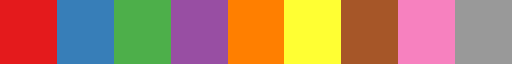

In [15]:
color_pallette = plt.get_cmap("Set1")
color_pallette

In [16]:
# colors = [color_pallette(3), color_pallette(0), color_pallette(4), color_pallette(2)]
# colors = [color_pallette(1), color_pallette(2), color_pallette(3), color_pallette(4)]
# colors = [color_pallette(1), color_pallette(3), color_pallette(2), color_pallette(0)]
colors = [color_pallette(1), color_pallette(3), color_pallette(2), color_pallette(4)]
line_styles = ["-", "--", "--", "--"]

KeyboardInterrupt: 

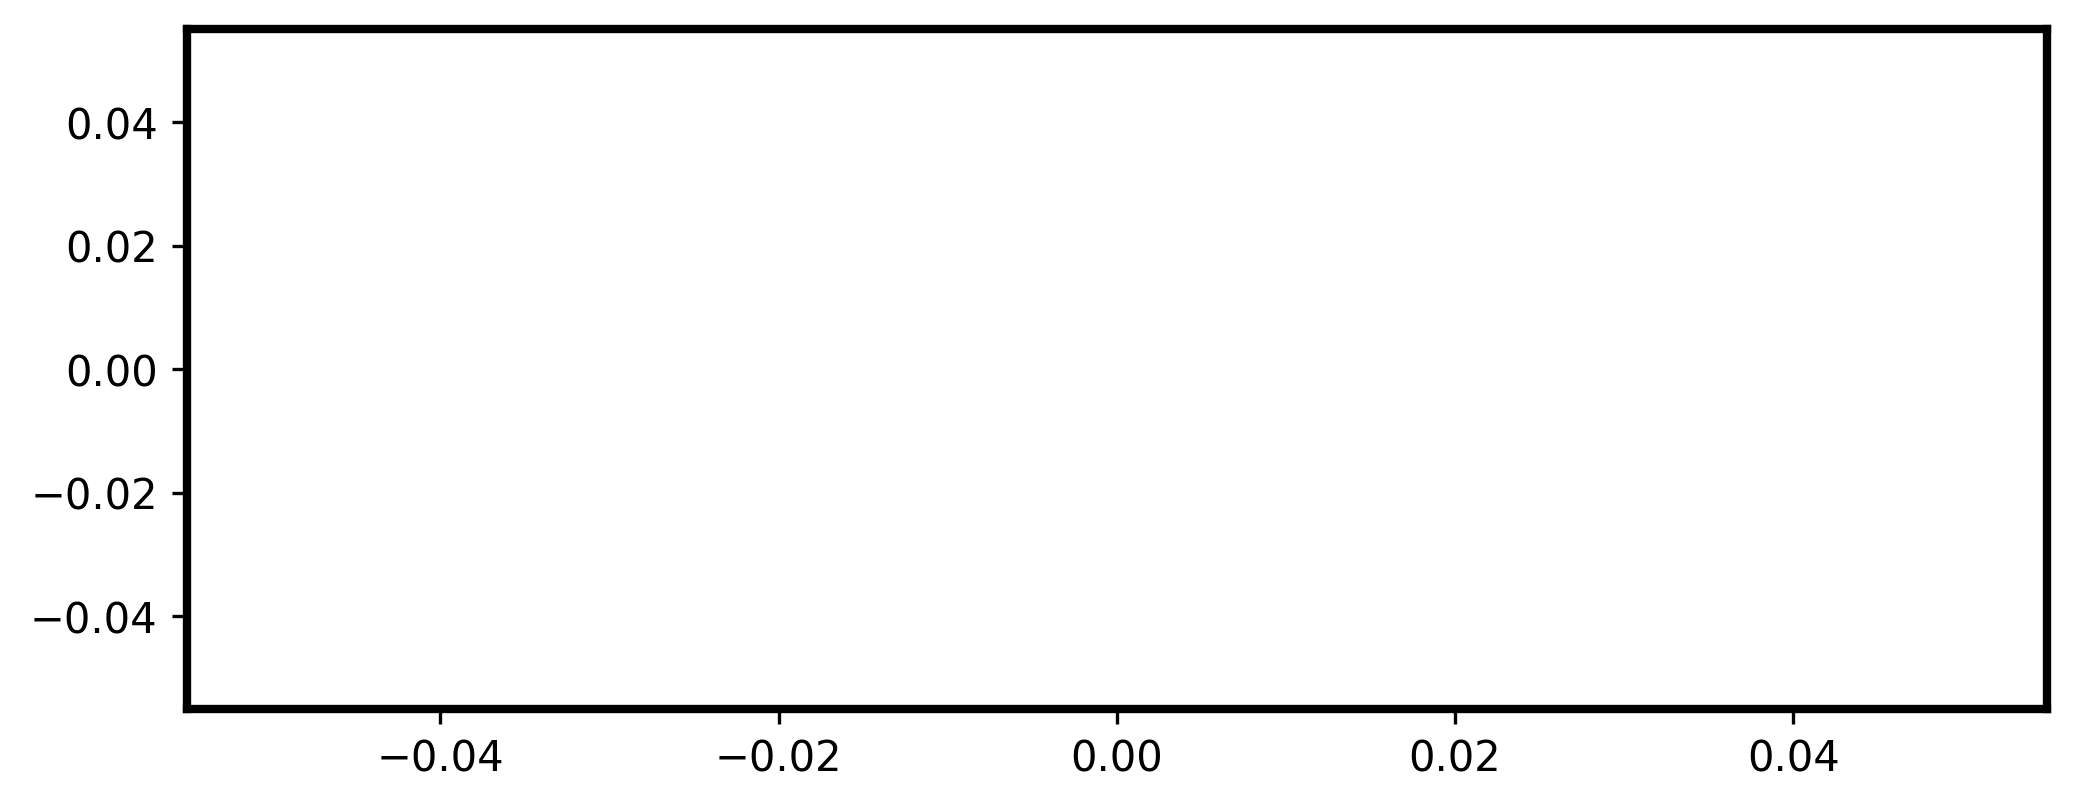

In [17]:
plt.rc('axes', linewidth=2)
plt.figure(figsize=(8, 3), dpi=300)
x_min = np.inf
# for idx, (approach, output) in enumerate(approach_to_dur_gap_mapping.items()):
#     plt.plot(output[0], output[1] * 100/ norm_factor, label=approach, color=colors[idx], linestyle=line_styles[idx], 
#             #  marker="o", 
#             #  mfc="white", 
#             #  mec=colors[idx], 
#             #  markersize=10, 
#              linewidth=3, 
#             #  markeredgewidth=3
#     )
#     x_min = np.minimum(x_min, np.min(output[0]))
sns.lineplot(x="dur", y="gap",
             hue="approach", data=data_df, palette=colors)
# #add arrow to plot
# plt.arrow(x=4, y=0.75, dx=0, dy=0.1, width=0.5, head_length=0.03, fc="white") 

#add annotation
min_y = 10
size_arrow = 14
min_x = 3.1
# plt.annotate('Better', xy = (3.1, min_y - 0.1))
bbox_props = dict(boxstyle="rarrow", ec="black", fc="white", lw=2)
t = plt.text(min_x, min_y, "Better", ha="center", va="center", rotation=90,
            size=size_arrow,
            bbox=bbox_props)
bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

plt.legend(fontsize=12, loc="lower right")
# plt.title("Pop2 + 2-shortest paths on B4", fontsize=16)
plt.xlabel("time (s)", fontsize=16)
plt.ylabel("norm advers gap (%)", fontsize=16)
plt.xscale('log')
# plt.yticks(np.arange(0.25, 0.47, 0.03), fontsize=14)
plt.yticks(fontsize=14)
plt.xticks([0.01, 0.1, 1, 10, 100, 1000], fontsize=14)
plt.xlim([0.009, 1100])
# plt.ylim([0, 46])
plt.grid(which="major", zorder=-1, linestyle="--")
plt.savefig(output_fig_dir + "pop2_2sp.jpg", bbox_inches="tight", format="jpg", dpi=300)
plt.savefig(output_fig_dir + "pop2_2sp.pdf", bbox_inches="tight", format="pdf", dpi=300)
print(x_min)